In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la database

In [69]:
df = pd.read_csv('QueryResultsSO.csv')
df.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,739,60277.0,<p>I want to use a <code>Track-Bar</code> to c...,8.0,...,2021-02-26 03:31:15,2021-02-26 03:31:15,How to convert a Decimal to a Double in C#?,<c#><floating-point><type-conversion><double><...,14.0,5,57.0,NaN,2012-10-31 16:42:47,CC BY-SA 4.0
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,310,21935.0,<p>I have an absolutely positioned <code>div</...,9.0,...,2021-01-29 18:46:45,2021-01-29 18:46:45,Why did the width collapse in the percentage w...,<html><css><internet-explorer-7>,7.0,1,12.0,NaN,NaN,CC BY-SA 4.0
2,7,2,NaN,4.0,2008-07-31 22:17:57,NaN,490,NaN,<p>An explicit cast to <code>double</code> lik...,9.0,...,2019-10-21 14:03:54,2019-10-21 14:03:54,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0
3,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,2053,697128.0,<p>Given a <code>DateTime</code> representing ...,1.0,...,2021-01-05 17:33:32,2021-09-24 16:38:57,How do I calculate someone's age based on a Da...,<c#><.net><datetime>,67.0,10,479.0,NaN,2011-08-16 19:40:43,CC BY-SA 4.0
4,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1590,181568.0,<p>Given a specific <code>DateTime</code> valu...,1.0,...,2017-06-04 15:51:19,2021-09-01 21:49:09,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,40.0,3,550.0,NaN,2009-09-04 13:15:59,CC BY-SA 3.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     50000 non-null  int64  
 1   PostTypeId             50000 non-null  int64  
 2   AcceptedAnswerId       7890 non-null   float64
 3   ParentId               40267 non-null  float64
 4   CreationDate           50000 non-null  object 
 5   DeletionDate           0 non-null      float64
 6   Score                  50000 non-null  int64  
 7   ViewCount              9733 non-null   float64
 8   Body                   50000 non-null  object 
 9   OwnerUserId            47823 non-null  float64
 10  OwnerDisplayName       43360 non-null  object 
 11  LastEditorUserId       19479 non-null  float64
 12  LastEditorDisplayName  10844 non-null  object 
 13  LastEditDate           19793 non-null  object 
 14  LastActivityDate       50000 non-null  object 
 15  Ti

In [70]:
#Récupération des colonnes utiles

df=df[['Id','CreationDate','Score','Body','Title','Tags','ViewCount','AnswerCount','CommentCount']]
df.dropna(subset = ['Tags'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9733 entries, 0 to 49998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            9733 non-null   int64  
 1   CreationDate  9733 non-null   object 
 2   Score         9733 non-null   int64  
 3   Body          9733 non-null   object 
 4   Title         9733 non-null   object 
 5   Tags          9733 non-null   object 
 6   ViewCount     9733 non-null   float64
 7   AnswerCount   9733 non-null   float64
 8   CommentCount  9733 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 760.4+ KB


In [16]:
#visualisation des data

df.describe()

,Id,Score,ViewCount,AnswerCount,CommentCount
count,9733.000000,9733.000000,9.733000e+03,9733.000000,9733.000000
mean,44783.685092,61.581732,4.737214e+04,7.029487,0.668653
std,24239.792108,303.574259,1.885036e+05,8.411580,1.635772
min,4.000000,-7.000000,7.600000e+01,0.000000,0.000000
25%,25277.000000,3.000000,1.700000e+03,3.000000,0.000000
50%,45582.000000,8.000000,5.334000e+03,5.000000,0.000000
75%,64436.000000,26.000000,2.162200e+04,8.000000,1.000000
max,87179.000000,8708.000000,4.569002e+06,296.000000,28.000000


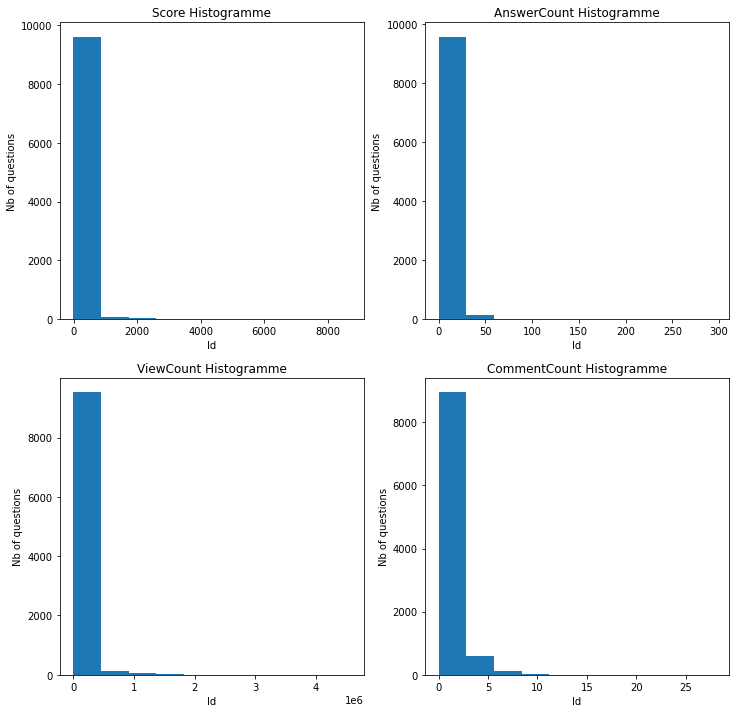

In [41]:
#Visualition du score, Views

fig, axs = plt.subplots(2, 2,figsize=(12,12))

df['Score'].plot.hist(ax = axs[0,0])

df['ViewCount'].plot.hist(ax = axs[1,0])

df['AnswerCount'].plot.hist(ax = axs[0,1])

df['CommentCount'].plot.hist(ax = axs[1,1])


axs[0,0].set_title('Score Histogramme')
axs[0,0].set_xlabel('Id')
axs[0,0].set_ylabel('Nb of questions')

axs[1,0].set_title('ViewCount Histogramme')
axs[1,0].set_xlabel('Id')
axs[1,0].set_ylabel('Nb of questions')

axs[0,1].set_title('AnswerCount Histogramme')
axs[0,1].set_xlabel('Id')
axs[0,1].set_ylabel('Nb of questions')

axs[1,1].set_title('CommentCount Histogramme')
axs[1,1].set_xlabel('Id')
axs[1,1].set_ylabel('Nb of questions')

plt.show()

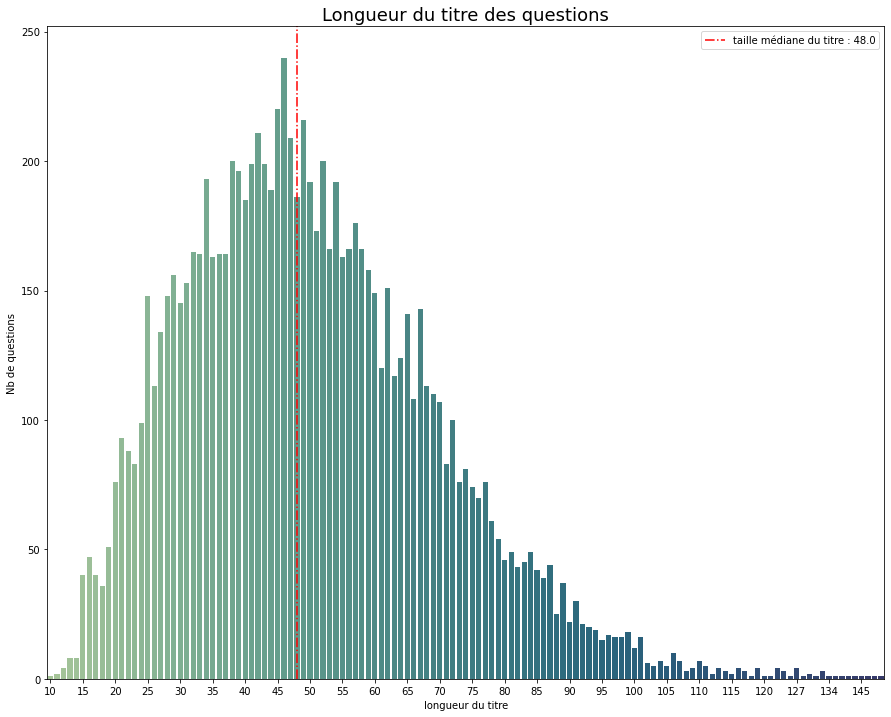

In [89]:
#Visualisation de la longueur des titres des questions

fig = plt.figure(figsize=(15, 12))
ax = sns.countplot(x=df.Title.str.len(),palette = 'crest')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 5))
plt.axvline(df.Title.str.len().median() - df.Title.str.len().min(),
            color="r", linestyle='-.',
            label="taille médiane du titre : "+str(df.Title.str.len().median()))
ax.set_xlabel("longueur du titre")
ax.set_ylabel('Nb de questions')
plt.title("Longueur du titre des questions",
          fontsize=18, color="black")
plt.legend()
plt.show()


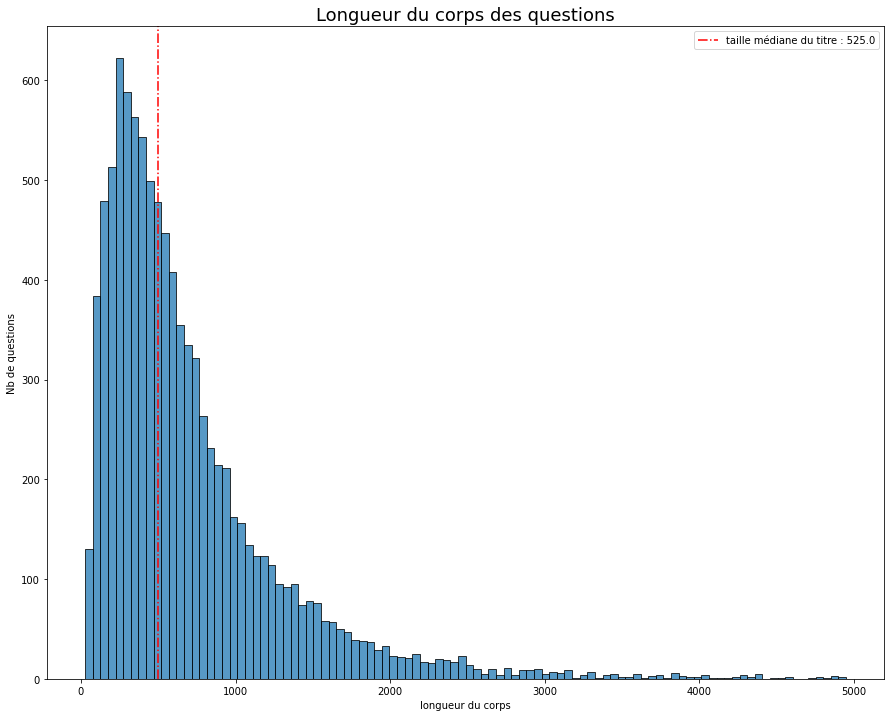

In [90]:
# Visualisation de la longueur du corps des questions 

fig = plt.figure(figsize=(15, 12))
ax = sns.histplot(x=df.Body.str.len(),palette = 'Paired',bins= 100)
start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(0, end, 5))
plt.axvline(df.Body.str.len().median() - df.Body.str.len().min(),
            color="r", linestyle='-.',
            label="taille médiane du titre : "+str(df.Body.str.len().median()))
ax.set_xlabel("longueur du corps")
ax.set_ylabel('Nb de questions')
plt.title("Longueur du corps des questions",
          fontsize=18, color="black")
plt.legend()
plt.show()

In [71]:
#Suppression des lignes avec un corps > 5000 mots

df = df[df.Body.str.len() <= 5000]


### Analyse des tags

In [72]:
df['Tags'].head(7)

0    <c#><floating-point><type-conversion><double><...
1                     <html><css><internet-explorer-7>
3                                 <c#><.net><datetime>
4    <c#><datetime><time><datediff><relative-time-s...
6    <html><browser><timezone><user-agent><timezone...
7                                         <.net><math>
8                   <c#><linq><web-services><.net-3.5>
Name: Tags, dtype: object

In [74]:
# on remplace les '< >'
df['Tags'] = df['Tags'].str.translate(str.maketrans({'<': '', '>': ','}))

# suppression de la dernière "," pour chaque ligne
df['Tags'] = df['Tags'].str[:-1]
df['Tags'].head(8)

0    c#,floating-point,type-conversion,double,decimal
1                        html,css,internet-explorer-7
3                                    c#,.net,datetime
4        c#,datetime,time,datediff,relative-time-span
6    html,browser,timezone,user-agent,timezone-offset
7                                           .net,math
8                       c#,linq,web-services,.net-3.5
9             mysql,database,binary-data,data-storage
Name: Tags, dtype: object

In [77]:
# Création d'une liste pour visualiser les tags les plus fréquents 
separator = ','
list_words = []
for word in df['Tags'].str.split(separator):
    list_words.extend(word)
df_list_words = pd.DataFrame(list_words, columns=["Tag"])
df_list_words = df_list_words.groupby("Tag").agg(tag_count=pd.NamedAgg(column="Tag", aggfunc="count"))
df_list_words.sort_values("tag_count", ascending=False, inplace=True)

In [79]:
print("Le jeu de données compte {} tags.".format((df_list_words.shape[0])))

Le jeu de données compte 3765 tags.


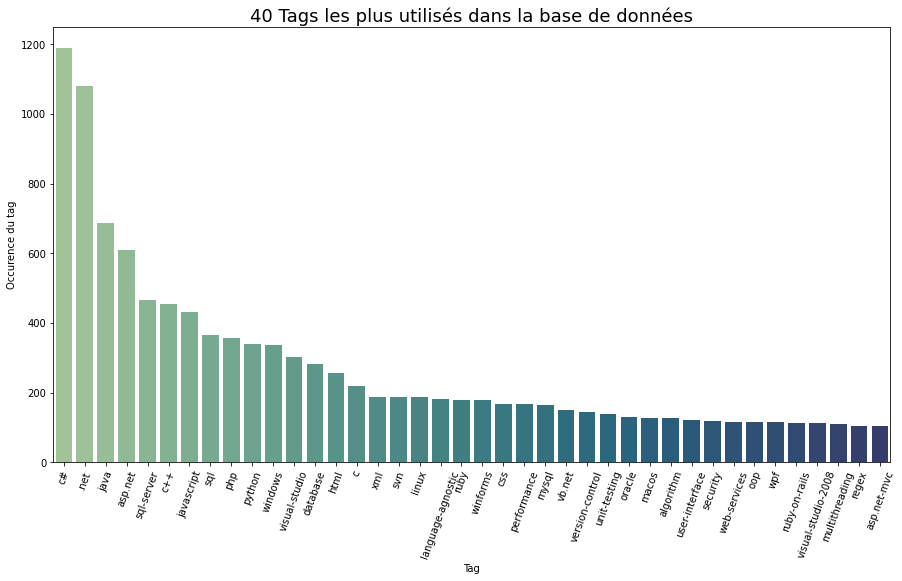

In [88]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=df_list_words.iloc[0:40, :],
            x=df_list_words.iloc[0:40, :].index,
            y="tag_count", palette = 'crest')
plt.xticks(rotation=70)
plt.ylabel('Occurence du tag')
plt.title("40 Tags les plus utilisés dans la base de données",
          fontsize=18)
plt.show()

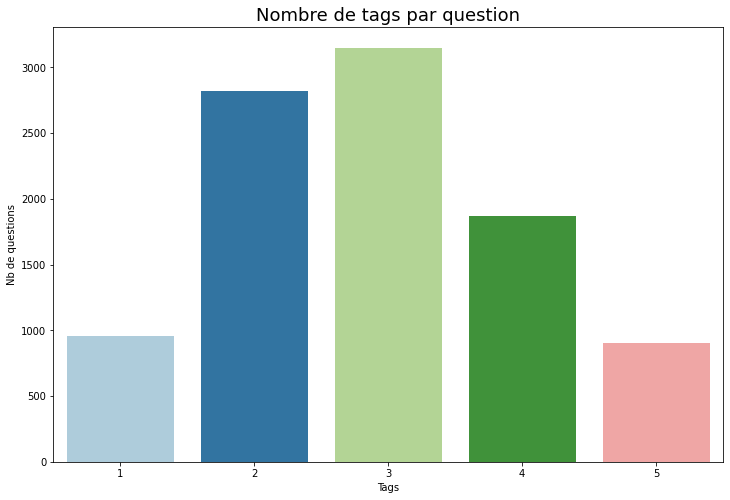

In [95]:
#Nombre de tags par question

df['Tags_list'] = df['Tags'].str.split(',')
df['Tags_count'] = df['Tags_list'].apply(lambda x: len(x))

# Plot the result
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df.Tags_count,palette = 'Paired')
ax.set_xlabel("Tags")
ax.set_ylabel('Nb de questions')
plt.title("Nombre de tags par question",
          fontsize=18)
plt.show()